In [10]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import cython

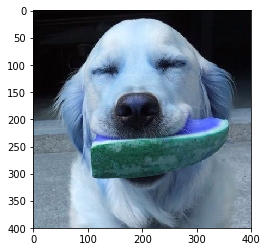

In [11]:
img = cv2.imread('dog.jpg')
plt.imshow(img)

# Quantização de cores uniforme

### Funções auxiliares

In [25]:
def primes(n):
    primfac = []
    d = 2
    while d*d <= n:
        while (n % d) == 0:
            primfac.append(d)
            n //= d
        d += 1
    if n > 1:
        primfac.append(n)
    return primfac

def primes_reduction(primes, n):
    factor = 1
    while len(primes) > n-1:
        factor *= primes.pop(0)
    primes.append(factor)
    return primes

def min_distance(pixel, cartesian):
    min = None
    min_array = []
    for c in cartesian:
        dist = np.linalg.norm(pixel-c)
        if min == None or dist < min:
            min = dist
            min_array = c
    return min_array        

In [30]:
n = 12
primes_list = primes_reduction(primes(n), 3)
a = np.linspace(0, 255, primes_list[0], dtype=int)
b = np.linspace(0, 255, primes_list[1], dtype=int)
c = np.linspace(0, 255, primes_list[2], dtype=int)

cartesian = np.array(np.meshgrid(a, b, c)).T.reshape(-1,3)
cartesian

array([[  0,   0,   0],
       [  0, 127,   0],
       [  0, 255,   0],
       [255,   0,   0],
       [255, 127,   0],
       [255, 255,   0],
       [  0,   0, 255],
       [  0, 127, 255],
       [  0, 255, 255],
       [255,   0, 255],
       [255, 127, 255],
       [255, 255, 255]])

In [31]:
def quant_uniforme(image, cartesian):
    h = image.shape[0]
    w = image.shape[1]
    for y in range(0, h):
        for x in range(0, w):
            image[y, x] = min_distance(image[y, x], cartesian)
    return image

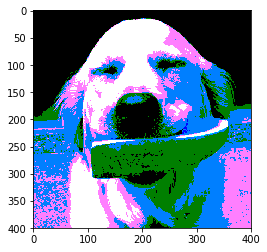

In [32]:
plt.imshow(quant_uniforme(img, cartesian))